**imports and getting the data**

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

در این دیتاست تعداد داده‌های آموزش 60000 و تعداد داده‌های تست 10000 هست

**Plot of the first nine images in the dataset**

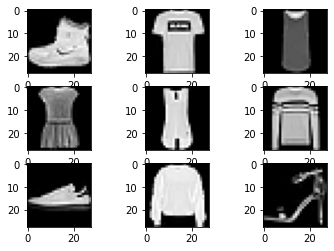

In [25]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow((X_train[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [42]:
def create_model(optimizer, loss_function):
  cnn = Sequential()
  cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
  cnn.add(MaxPool2D(pool_size=2, strides=2))
  cnn.add(Dropout(0.2))
  cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
  cnn.add(MaxPool2D(pool_size=2, strides=2))
  cnn.add(Dropout(0.2))
  cnn.add(Flatten())
  cnn.add(Dense(units=128, activation='relu'))
  cnn.add(Dense(units=10, activation='softmax'))
  cnn.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
  model = cnn.fit(X_train, Y_train, batch_size=32, epochs=30)

  return model, cnn

In [41]:
my_model, cnn = create_model('adam', 'categorical_crossentropy')

Epoch 1/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.7502 - accuracy: 0.7739
Epoch 2/30
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4008 - accuracy: 0.8529
Epoch 3/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3551 - accuracy: 0.8674
Epoch 4/30
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3336 - accuracy: 0.8763
Epoch 5/30
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3197 - accuracy: 0.8808
Epoch 6/30
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3044 - accuracy: 0.8847
Epoch 7/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2945 - accuracy: 0.8893
Epoch 8/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2844 - accuracy: 0.8911
Epoch 9/30
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2802 - accuracy: 0.8935
Epoch 10/30
1875/1875 [==============================] - 49s 26m

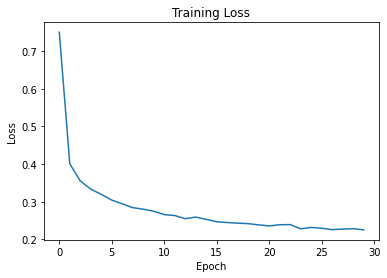

In [44]:
plt.plot(my_model.epoch, my_model.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

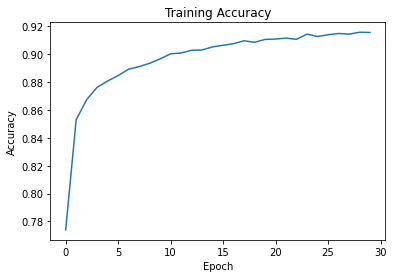

In [45]:
plt.plot(my_model.epoch, my_model.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [47]:
predict_my_model = cnn.predict(X_test)
rounded = [round(x[0]) for x in predict_my_model]
correct_answer = 0
for i in range(len(Y_test)):
  if np.argmax(predict_my_model[i]) == np.argmax(Y_test[i]):
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(Y_test))

Accuracy in Test Set:  0.89


In [48]:
confusion_matrix(Y_test.argmax(axis=1), predict_my_model.argmax(axis=1))

array([[745,   1,   8,  19,   2,   0, 218,   1,   5,   1],
       [  3, 972,   0,  17,   1,   0,   4,   0,   3,   0],
       [ 10,   0, 795,  12,  63,   0, 118,   0,   2,   0],
       [  8,   7,  10, 909,  12,   1,  45,   0,   8,   0],
       [  1,   1,  55,  56, 767,   0, 115,   0,   5,   0],
       [  0,   0,   0,   0,   0, 989,   0,  10,   0,   1],
       [ 54,   2,  42,  24,  53,   0, 817,   1,   7,   0],
       [  0,   0,   0,   0,   0,  15,   0, 968,   0,  17],
       [  2,   1,   1,   4,   2,   2,   8,   1, 979,   0],
       [  0,   0,   0,   0,   0,  12,   0,  29,   0, 959]])

In [76]:
targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5',
'Class 6', 'Class 7','Class 8', 'Class 9']
print(classification_report(Y_test.argmax(axis=1), predict_my_model.argmax(axis=1), target_names=targets))

              precision    recall  f1-score   support

     Class 0       0.91      0.74      0.82      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.87      0.80      0.83      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.85      0.77      0.81      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.62      0.82      0.70      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



در نمودارات تغییرات دقت و خطا عملکرد مدل را مشاهده می‌کنید و در جدول بالا مقدار دقت و پوشش برای هر کلاس را مشاهده می‌کنید.
دقت در داده‌های تست مقدار 0.89 هست که قابل قبول هست